# Task 2: To Explore Supervised Machine Learning

### Importing libraries and modules

In [10]:
#Importing all the libraries and modules needed to complete this task
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Reading and displaying data

In [11]:
#Reading the dataset from the remote link provided using pandas 
data = "http://bit.ly/w-data"
df = pd.read_csv(data)
#printing the entire dataset
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [12]:
#printing the 1st five rows of the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
#displaying some basic statistical details of the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualizing the relationship between the data

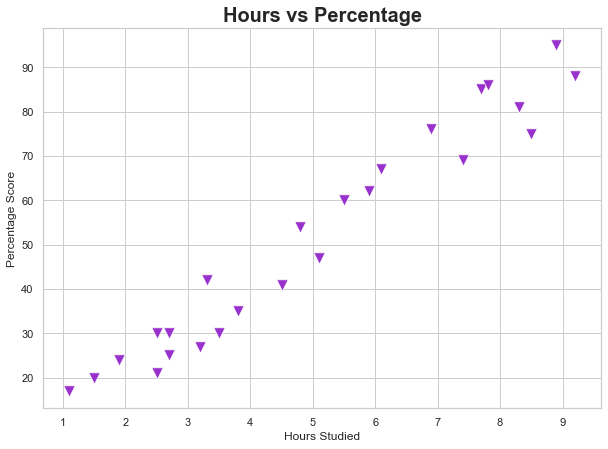

In [15]:
#a plot to check manually if a linear relation exists between 'Hours Studied' and 'Percentage Score'
fig = plt.figure(figsize=(10, 7))
ax = sns.scatterplot(x=df.Hours, y=df.Scores,marker="v",s=130,color="darkorchid")
ax.set(xlabel='Hours Studied', ylabel='Percentage Score')
sns.set(style='whitegrid',)
plt.title('Hours vs Percentage',fontweight ='bold', fontsize=20) 
plt.show()
#the plot below depicts a linear relation between 'Hours Studied' and 'Percentage Score'

### Preparing the data and Train-Test split 

In [16]:
#dividing the dataset into attributes and labels
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

#splitting the dataset in 80-20 ratio into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Training the algorithm 

In [17]:
#training the model
r = LinearRegression()  
r.fit(x_train, y_train)
print('Model successfully trained.')

Model successfully trained.


### Plotting the regression line 

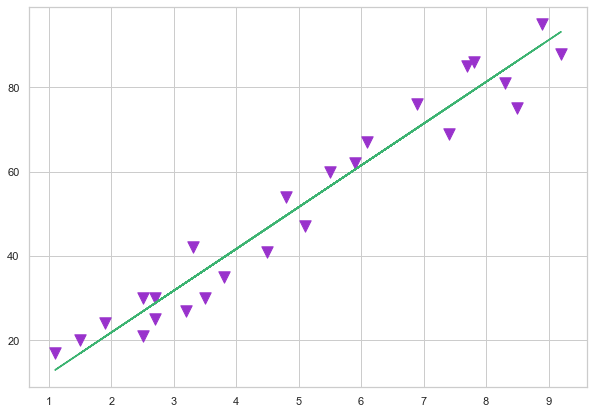

In [18]:
# evaluating the regression line
regressionLine = r.coef_*x+r.intercept_
# We draw a scatterplot with the test data and try to fit a line on it.
fig = plt.figure(figsize=(10, 7))
plt.scatter(x, y,marker="v",s=130,color="darkorchid")
plt.plot(x, regressionLine, color="mediumseagreen");
plt.show()

### Predictions 

In [19]:
# printing testing data in hours
print(x_test)
# predicting scores
y_pred = r.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Actual Score vs Predicted Score Comparison 

In [20]:
# Comparing actual scores vs predicted scores
d = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})  
d 

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Visualizing the comparison 

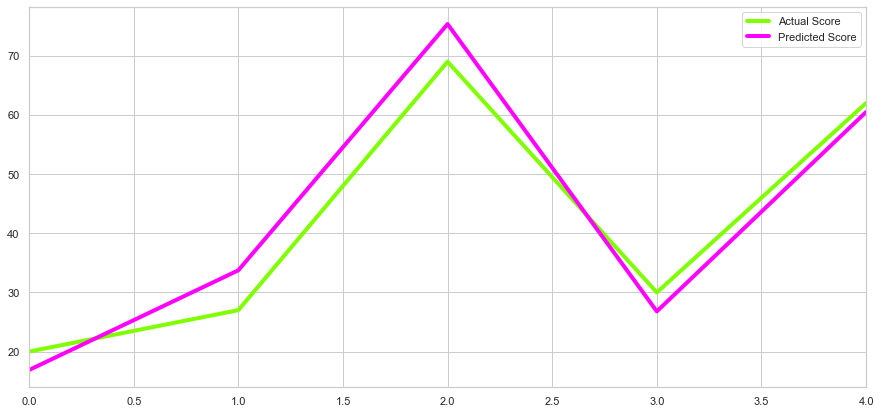

In [21]:
# comparing Actual and Predicted Scores visually
d.plot(kind='line', figsize=(15, 7),linewidth='4',color=['chartreuse','fuchsia'])
plt.show()

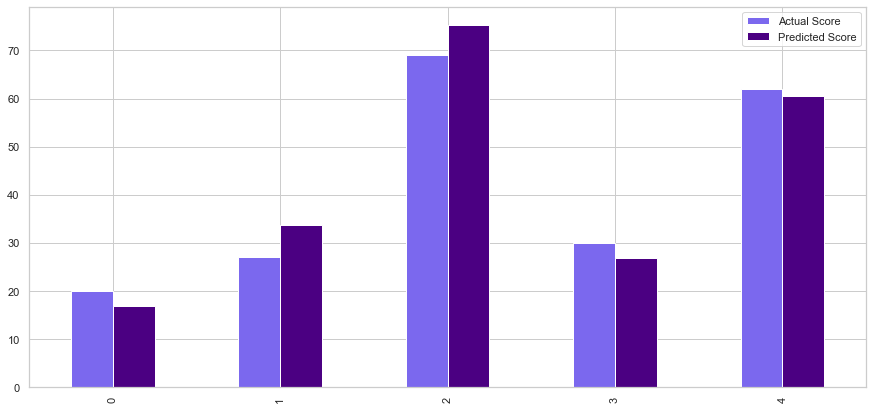

In [22]:
# Alternate method of comparing Actual and Predicted Scores visually
d.plot(kind='bar', figsize=(15, 7),color=['mediumslateblue','indigo'])
plt.show()

### Testing the model with given data 

In [25]:
# Printing the predicted score if a student studies for 9.25 hrs in a day
hrs = 9.25
prediction = r.predict([[hrs]])
print("No. of Hours : %5.2f" %(hrs))
print("Predicted Score : %5.25f" %(prediction[0]))

No. of Hours :  9.25
Predicted Score : 93.6917324873753756264704862


### Evaluating the model using different metrics 

In [26]:
#evaluating the model with different metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))    # Mean Absolute Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))      # Mean Squared Error
print('R2 Score:', metrics.r2_score(y_test, y_pred))                          # R2 Score

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
R2 Score: 0.9454906892105356
